# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

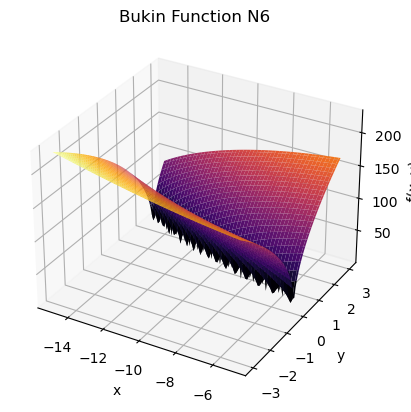

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def bukin_function(x, y):
    term1 = 100 * np.abs(y - 0.01 * x ** 2) ** 0.5
    term2 = 0.01 * np.abs(x + 10)
    return term1 + term2

# Generate data for plotting
x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = bukin_function(X, Y)

# Plot the function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Bukin Function N6')
plt.show()

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [47]:
def bukin_function(x, y):
    term1 = 100 * np.sqrt(np.abs(y - 0.01 * x ** 2))
    term2 = 0.01 * np.abs(x + 10)
    return term1 + term2

def generate_neighbor(current_state, step_size):
    neighbor = current_state + np.random.uniform(low=-step_size, high=step_size, size=current_state.shape)
    return neighbor

def hill_climbing(initial_state, step_size, max_iterations):
    current_state = initial_state
    best_state = current_state
    for _ in range(max_iterations):
        neighbor = generate_neighbor(current_state, step_size)
        if bukin_function(neighbor[0], neighbor[1]) < bukin_function(best_state[0], best_state[1]):
            best_state = neighbor
        if bukin_function(neighbor[0], neighbor[1]) < bukin_function(current_state[0], current_state[1]):
            current_state = neighbor
        else:
            break
    return best_state

# Define the initial state
initial_state = np.array([-10, 1])
# Define the step size for generating neighbors
step_size = 0.1
# Define the maximum number of iterations
max_iterations = 1000

# Run the Hill Climbing algorithm
best_state = hill_climbing(initial_state, step_size, max_iterations)
minimum_value = bukin_function(best_state[0], best_state[1])

print("Best state found:", best_state)
print("Minimum value found:", minimum_value)

Best state found: [-10   1]
Minimum value found: 0.0


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [52]:
import numpy as np

def evaluate_knapsack(solution, values, weights, capacity):
    total_value = np.sum(solution * values)
    total_weight = np.sum(solution * weights)
    if total_weight > capacity:
        total_value = 0
    return total_value

def generate_neighbor(current_solution):
    neighbor = np.copy(current_solution)
    zero_indices = np.where(neighbor == 0)[0]
    
    if len(zero_indices) > 0:
        one_index = np.random.choice(zero_indices)
        neighbor[one_index] = 1
    
    return neighbor

def hill_climbing_knapsack(num_elements, values, weights, capacity, max_iterations):
    current_solution = np.zeros(num_elements)
    best_solution = current_solution
    best_value = evaluate_knapsack(best_solution, values, weights, capacity)
    
    for _ in range(max_iterations):
        neighbor = generate_neighbor(current_solution)
        neighbor_value = evaluate_knapsack(neighbor, values, weights, capacity)
        
        if neighbor_value > best_value:
            best_solution = neighbor
            best_value = neighbor_value
        
        current_solution = neighbor
    
    return best_solution, best_value

# Define the values and weights of the items
values = np.array([10, 5, 8, 2, 1])
weights = np.array([3, 2, 4, 1, 2])
# Define the capacity of the knapsack
capacity = 7
# Define the maximum number of iterations
max_iterations = 1000

num_elements = len(values)

# Run the Hill Climbing algorithm for the Knapsack Problem
best_solution, best_value = hill_climbing_knapsack(num_elements, values, weights, capacity, max_iterations)

print("Best solution found:", best_solution)
print("Best value found:", best_value)


Best solution found: [1. 1. 0. 0. 1.]
Best value found: 16.0



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [57]:
import numpy as np

def evaluate_knapsack(solution, values, weights, capacity):
    total_value = np.sum(solution * values)
    total_weight = np.sum(solution * weights)
    if total_weight > capacity:
        total_value = 0
    return total_value

def generate_neighbor(current_solution):
    neighbor = np.copy(current_solution)
    zero_indices = np.where(neighbor == 0)[0]
    
    if len(zero_indices) > 0:
        one_index = np.random.choice(zero_indices)
        neighbor[one_index] = 1
    
    return neighbor

def random_restart_hill_climbing_knapsack(num_elements, values, weights, capacity, num_restarts, max_iterations):
    best_solution = None
    best_value = 0
    
    for _ in range(num_restarts):
        current_solution = np.random.randint(2, size=num_elements) #By incorporating random restarts, 
        #the algorithm has a higher chance of escaping local optima and finding better solutions
        current_value = evaluate_knapsack(current_solution, values, weights, capacity)
        
        for _ in range(max_iterations):
            neighbor = generate_neighbor(current_solution)
            neighbor_value = evaluate_knapsack(neighbor, values, weights, capacity)
            
            if neighbor_value > current_value:
                current_solution = neighbor
                current_value = neighbor_value
            
            if current_value > best_value:
                best_solution = current_solution
                best_value = current_value
        
    return best_solution, best_value

# Define the values and weights of the items
values = np.array([10, 5, 8, 2, 1])
weights = np.array([3, 2, 4, 1, 2])
# Define the capacity of the knapsack
capacity = 7
# Define the number of restarts and maximum iterations per restart
num_restarts = 10
max_iterations = 1000

num_elements = len(values)

# Run the Random Restart Hill Climbing algorithm for the Knapsack Problem
best_solution, best_value = random_restart_hill_climbing_knapsack(num_elements, values, weights, capacity, num_restarts, max_iterations)

print("Best solution found:", best_solution)
print("Best value found:", best_value)


Best solution found: [1 1 0 1 0]
Best value found: 17
